# <center>Github DATA visualisation / analysis<center>
## <center>YouCode - Bentaleb SAAD<center>
---

## 1 - Loading Data
---

In [12]:
import pandas as pd
import numpy as np
from utils_graphs import plot_barplot

In [3]:
# Loading data from the csv files
repositories_df = pd.read_csv('data/repos.csv')
commits_df = pd.read_csv('data/commits.csv')
languages_df = pd.read_csv('data/languages.csv')

In [6]:
print('Repositories:')
print(repositories_df.info())
print('\nCommits:')
print(commits_df.info())
print('\nLanguages:')
print(languages_df.info())

Repositories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15490 non-null  object
 1   url                  15490 non-null  object
 2   description          15490 non-null  object
 3   stars                15490 non-null  int64 
 4   created_at           15490 non-null  object
 5   language             15490 non-null  object
 6   forks                15490 non-null  int64 
 7   watchers             15490 non-null  int64 
 8   open_issues          15490 non-null  int64 
 9   owner                15490 non-null  object
 10  contributors_count   15490 non-null  int64 
 11  contributors         15490 non-null  object
 12  contributions_count  15490 non-null  object
 13  languages            15490 non-null  object
 14  bites_of_code        15490 non-null  object
dtypes: int64(5), object(10)
memory usage: 1

## Tendence analysis
---

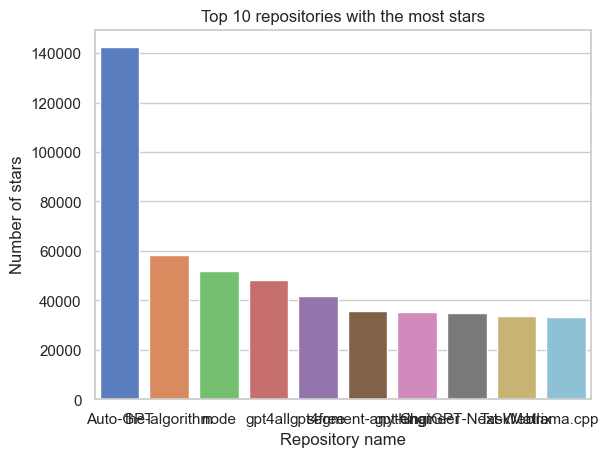

In [14]:
# plot the barplot for the top 10 repositories with the most stars
repositories_df = repositories_df.sort_values(by='stars', ascending=False)
plot_barplot(data=repositories_df.head(10), x='name', y='stars', hue=None, title='Top 10 repositories with the most stars', xlabel='Repository name', ylabel='Number of stars')